In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("C:/Users/niceq/Documents/DataScience/Python ML Guide/Data/04. train_santander.csv",
                      encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
print(cust_df.var3.value_counts()[:10])

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: count, dtype: int64


In [14]:
# var3의 -999999 값을 2로 변환
cust_df['var3'].replace(-999999, 2, inplace=True)
# ID 피처 드롭
cust_df.drop('ID', axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

In [15]:
# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DF의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [17]:
# X_train, y_train을 다시 쪼개서 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators=500, random_state는 예제 수행 시마다 동일하게
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 100
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

In [21]:
from hyperopt import hp

# max_depth = 5~15, 1간격 / min_child_weight=1~6, 1간격
# colsample_bytree = 0.5~0.95 / learning_rate=0.01~0.2
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95)
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2) }

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin() 함수 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후
# -1을 곱하여 roc_auc 평균 값 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early_stopping_rounds =30으로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률 값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적 함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적 함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수 지정
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

In [26]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5)
                       )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수헹
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81902	validation_1-auc:0.80646
[1]	validation_0-auc:0.82802	validation_1-auc:0.81008
[2]	validation_0-auc:0.83126	validation_1-auc:0.81286
[3]	validation_0-auc:0.83239	validation_1-auc:0.81221
[4]	validation_0-auc:0.83608	validation_1-auc:0.81141
[5]	validation_0-auc:0.84103	validation_1-auc:0.81686
[6]	validation_0-auc:0.84462	validation_1-auc:0.81850
[7]	validation_0-auc:0.84498	validation_1-auc:0.81835
[8]	validation_0-auc:0.84650	validation_1-auc:0.81916
[9]	validation_0-auc:0.84669	validation_1-auc:0.81866
[10]	validation_0-auc:0.84426	validation_1-auc:0.81671
[11]	validation_0-auc:0.84402	validation_1-auc:0.81706
[12]	validation_0-auc:0.84707	validation_1-auc:0.81956
[13]	validation_0-auc:0.85083	validation_1-auc:0.82234
[14]	validation_0-auc:0.85245	validation_1-auc:0.82425
[15]	validation_0-auc:0.85463	validation_1-auc:0.82629
[16]	validation_0-auc:0.85502	validation_1-auc:0.82669
[17]	validation_0-auc:0.85736	validation_1-auc:0.82757
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

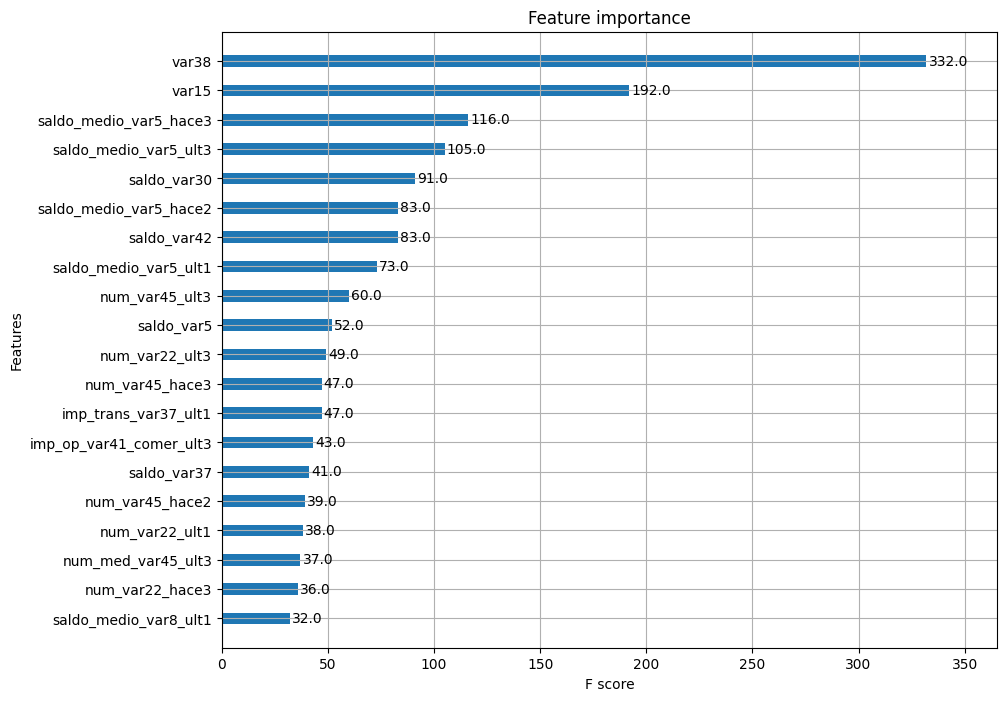

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [31]:
from lightgbm import LGBMClassifier
# lightgbm 업데이트로 인한 조기 중단 import
from lightgbm import early_stopping, log_evaluation

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = ([(X_tr, y_tr), (X_val, y_val)])
lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set, eval_metric='auc',
             callbacks=[early_stopping(stopping_rounds=100), log_evaluation(period=1)]
            )

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's a

In [32]:
# HyperOpt를 이용한 하이퍼 파라미터 튜닝 위한 검색 공간 설정
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [39]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                             num_leaves=int(search_space['num_leaves']),
                             max_depth=int(search_space['max_depth']),
                            min_child_samples=int(search_space['min_child_samples']),
                             subsample=search_space['subsample'],
                            learning_rate=search_space['learning_rate']
                             )

    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early_stopping_rounds =30으로 설정하고 추출된 학습과 검증 데이터로 LGBMClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, eval_metric='auc',
                     eval_set=[(X_tr, y_tr), (X_val, y_val)],
                     callbacks=[early_stopping(stopping_rounds=30), log_evaluation(period=1)])
        
        # 1로 예측한 확률 값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값 반환하되,
    # HyperOpt는 목적 함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수 지정
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[LightGBM] [Info] Number of positive: 1579, number of negative: 38965                                                  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016348 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12827                                                                                     
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192                          
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872                                        
[LightGBM] [Info] Start training from score -3.205872                                                                  
[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
Training until validation scores do

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[92]	training's auc: 0.881717	training's binary_logloss: 0.123087	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.136735
[93]	training's auc: 0.882035	training's binary_logloss: 0.122948	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.136704
[94]	training's auc: 0.882382	training's binary_logloss: 0.122825	valid_1's auc: 0.836898	valid_1's binary_logloss: 0.136671
[95]	training's auc: 0.882662	training's binary_logloss: 0.122706	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.136631
[96]	training's auc: 0.88288	training's binary_logloss: 0.122594	valid_1's auc: 0.837059	valid_1's binary_logloss: 0.136609
[97]	training's auc: 0.883181	training's binary_logloss: 0.12247	valid_1's auc: 0.836981	valid_1's binary_logloss: 0.136597
[98]	training's auc: 0.883472	training's binary_logloss: 0.122359	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.136565
[99]	training's auc: 0.883711	training's binary_logloss: 0.122237	valid_1's auc: 0.836967	valid_1's binary_logloss: 0.136536
[1

In [41]:
lgbm_clf = LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5)
                             )

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc',
                     eval_set=[(X_tr, y_tr), (X_val, y_val)],
                     callbacks=[early_stopping(stopping_rounds=100), log_evaluation(period=1)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13001
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.828566	training's binary_logloss: 0.16019	valid_1's auc: 0.809969	valid_1's binary_logloss: 0.161837
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.832877	training's binary_logloss: 0.156777	valid_1's auc: 0.810876	valid_1's binary_logloss: 0.158948
[3]	training's auc: 0.836379	training's binary_logloss: 0.153923	valid_1's auc: 0.813737	valid_1's binary_logloss: 0.156477
[4]	trai